# Análisis Exploratorio de Datos (EDA)

Se analizan los datasets `costs.csv`, `orders.csv`,  `visits.csv`.

## Importación de Librerías Necesarias

Se importan las liberías requeridas para el EDA, y se realizan las configuraciones iniciales.

In [2]:
# Librerías

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Configuraciones iniciales

pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")
os.makedirs("../reports/figures/raw", exist_ok=True)


## Carga de Datos

Se cargan los tres conjuntos de datos provenientes del directorio `data/raw`

In [3]:
visits = pd.read_csv("../data/raw/visits.csv", parse_dates=["Start Ts", "End Ts"])
orders = pd.read_csv("../data/raw/orders.csv", parse_dates=["Buy Ts"])
costs = pd.read_csv("../data/raw/costs.csv", parse_dates=["dt"])

# Renombrar columnas para consistencia
visits.columns = visits.columns.str.strip().str.lower().str.replace(" ", "_")
orders.columns = orders.columns.str.strip().str.lower().str.replace(" ", "_")
costs.columns = costs.columns.str.strip().str.lower().str.replace(" ", "_")

## Previsualización

Se efectúa un primer vistazo a los datasets, renombrando columnas para una mejor consistencia

In [4]:
print("== VISITS ==")
print(visits.head(), "\n")
print("== ORDERS ==")
print(orders.head(), "\n")
print("== COSTS ==")
print(costs.head(), "\n")

== VISITS ==
    device              end_ts  source_id            start_ts  \
0    touch 2017-12-20 17:38:00          4 2017-12-20 17:20:00   
1  desktop 2018-02-19 17:21:00          2 2018-02-19 16:53:00   
2    touch 2017-07-01 01:54:00          5 2017-07-01 01:54:00   
3  desktop 2018-05-20 11:23:00          9 2018-05-20 10:59:00   
4  desktop 2017-12-27 14:06:00          3 2017-12-27 14:06:00   

                    uid  
0  16879256277535980062  
1    104060357244891740  
2   7459035603376831527  
3  16174680259334210214  
4   9969694820036681168   

== ORDERS ==
               buy_ts  revenue                   uid
0 2017-06-01 00:10:00    17.00  10329302124590727494
1 2017-06-01 00:25:00     0.55  11627257723692907447
2 2017-06-01 00:27:00     0.37  17903680561304213844
3 2017-06-01 00:29:00     0.55  16109239769442553005
4 2017-06-01 07:58:00     0.37  14200605875248379450 

== COSTS ==
   source_id         dt  costs
0          1 2017-06-01  75.20
1          1 2017-06-02  62.25


## Tipos de Datos

Acto seguido, se observa qué tipo de datos tienen los tres conjuntos de datos

In [5]:
print("Tipos de datos - VISITS:")
print(visits.dtypes, "\n")
print("Tipos de datos - ORDERS:")
print(orders.dtypes, "\n")
print("Tipos de datos - COSTS:")
print(costs.dtypes, "\n")

Tipos de datos - VISITS:
device               object
end_ts       datetime64[ns]
source_id             int64
start_ts     datetime64[ns]
uid                  uint64
dtype: object 

Tipos de datos - ORDERS:
buy_ts     datetime64[ns]
revenue           float64
uid                uint64
dtype: object 

Tipos de datos - COSTS:
source_id             int64
dt           datetime64[ns]
costs               float64
dtype: object 



## Datos Faltantes

Se buscan registros nulos para las tres tablas

In [6]:
print("Datos faltantes - VISITS:\n", visits.isnull().sum(), "\n")
print("Datos faltantes - ORDERS:\n", orders.isnull().sum(), "\n")
print("Datos faltantes - COSTS:\n", costs.isnull().sum(), "\n")

Datos faltantes - VISITS:
 device       0
end_ts       0
source_id    0
start_ts     0
uid          0
dtype: int64 

Datos faltantes - ORDERS:
 buy_ts     0
revenue    0
uid        0
dtype: int64 

Datos faltantes - COSTS:
 source_id    0
dt           0
costs        0
dtype: int64 



## Estadísticas

Estadísticas Descriptivas para los tres datasets

In [7]:
print("=== Estadísticas - VISITS ===")
print(visits.describe(include='all'), "\n")

print("=== Estadísticas - ORDERS ===")
print(orders.describe(), "\n")

print("=== Estadísticas - COSTS ===")
print(costs.describe(), "\n")

=== Estadísticas - VISITS ===
         device                         end_ts      source_id  \
count    359400                         359400  359400.000000   
unique        2                            NaN            NaN   
top     desktop                            NaN            NaN   
freq     262567                            NaN            NaN   
mean        NaN  2017-12-18 06:28:15.036205056       3.750515   
min         NaN            2017-06-01 00:02:00       1.000000   
25%         NaN            2017-10-15 09:45:45       3.000000   
50%         NaN            2017-12-18 18:59:30       4.000000   
75%         NaN            2018-02-28 10:08:15       5.000000   
max         NaN            2018-06-01 01:26:00      10.000000   
std         NaN                            NaN       1.917116   

                             start_ts           uid  
count                          359400  3.594000e+05  
unique                            NaN           NaN  
top                        

## Duración de la Sesión

Se resta el fin de la sesión menos el inicio para obtener la duración de cada sesión

Resumen de duración de sesión (en minutos):


count    359400.000000
mean         10.717095
std          16.618796
min         -46.000000
25%           2.000000
50%           5.000000
75%          14.000000
max         711.000000
Name: session_duration, dtype: float64 



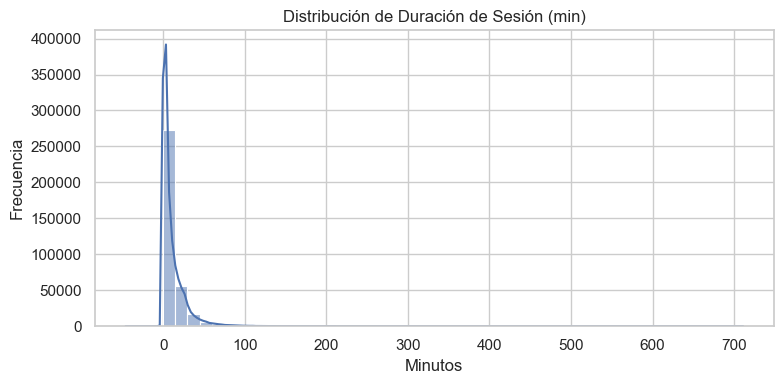

In [8]:
# Duración de sesión
visits["session_duration"] = (visits["end_ts"] - visits["start_ts"]).dt.total_seconds() / 60

# Estadísticas resumen por consola
print("Resumen de duración de sesión (en minutos):")
print(visits["session_duration"].describe(), "\n")

# Visualización
plt.figure(figsize=(8, 4))
sns.histplot(visits["session_duration"], bins=50, kde=True)
plt.title("Distribución de Duración de Sesión (min)")
plt.xlabel("Minutos")
plt.ylabel("Frecuencia")
plt.tight_layout()
plt.savefig("../reports/figures/raw/session_duration.png")
plt.show()


## Beneficio Económico

Vistazo inicial al Beneficio Económico

Resumen de ingresos (revenue):
count    50415.000000
mean         4.999647
std         21.818359
min          0.000000
25%          1.220000
50%          2.500000
75%          4.890000
max       2633.280000
Name: revenue, dtype: float64 



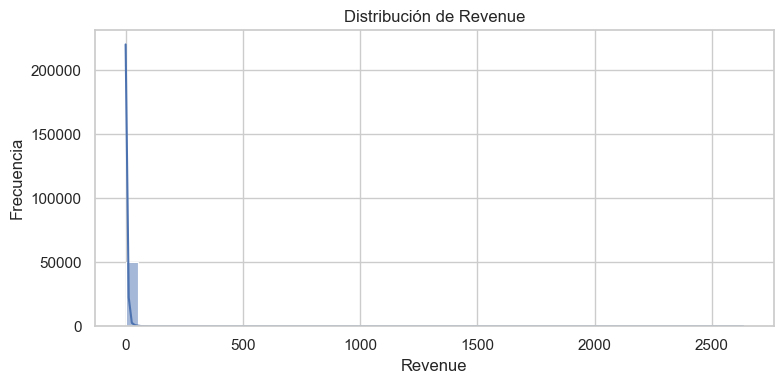

In [9]:
# Estadísticas resumen de revenue
print("Resumen de ingresos (revenue):")
print(orders["revenue"].describe(), "\n")

# Visualización
plt.figure(figsize=(8, 4))
sns.histplot(orders["revenue"], bins=50, kde=True)
plt.title("Distribución de Revenue")
plt.xlabel("Revenue")
plt.ylabel("Frecuencia")
plt.tight_layout()
plt.savefig("../reports/figures/raw/revenue_distribution.png")
plt.show()


## Costos Diarios

Se calculan los gastos por día para cada fuente

Costos diarios - resumen:
count     364.000000
mean      904.207747
std       396.956825
min         0.700000
25%       595.682500
50%       873.655000
75%      1155.605000
max      3458.860000
Name: costs, dtype: float64 



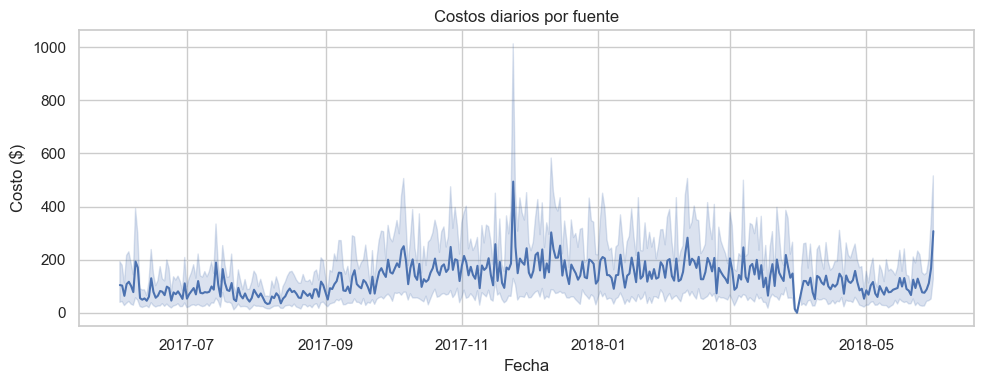

In [10]:
# Estadísticas resumen
print("Costos diarios - resumen:")
print(costs.groupby("dt")["costs"].sum().describe(), "\n")

# Visualización
plt.figure(figsize=(10, 4))
sns.lineplot(data=costs, x="dt", y="costs")
plt.title("Costos diarios por fuente")
plt.xlabel("Fecha")
plt.ylabel("Costo ($)")
plt.tight_layout()
plt.savefig("../reports/figures/raw/daily_costs.png")
plt.show()


## Dispositivos

Análisis categórico de los dispositivos con mayor uso

Conteo de dispositivos utilizados:
device
desktop    262567
touch       96833
Name: count, dtype: int64 



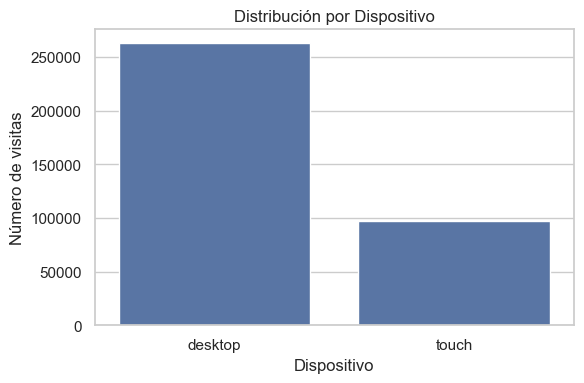

In [11]:
device_counts = visits["device"].value_counts()
print("Conteo de dispositivos utilizados:")
print(device_counts, "\n")

# Visualización
plt.figure(figsize=(6, 4))
sns.countplot(data=visits, x="device", order=device_counts.index)
plt.title("Distribución por Dispositivo")
plt.xlabel("Dispositivo")
plt.ylabel("Número de visitas")
plt.tight_layout()
plt.savefig("../reports/figures/raw/device_distribution.png")
plt.show()


## Visitas

Visitas para cada fuente

Distribución de visitas por Source ID:
 source_id
1      34121
2      47626
3      85610
4     101794
5      66905
6          6
7         36
9      13277
10     10025
Name: count, dtype: int64 



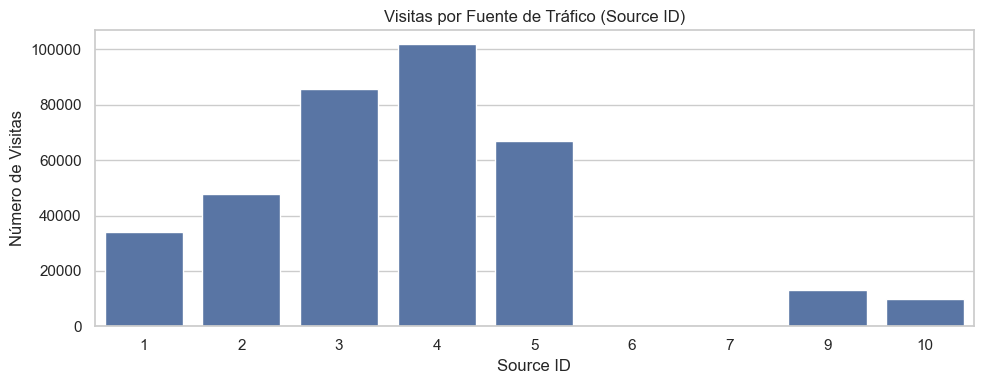

In [12]:
source_counts = visits["source_id"].value_counts().sort_index()
print("Distribución de visitas por Source ID:\n", source_counts, "\n")

plt.figure(figsize=(10, 4))
sns.countplot(data=visits, x="source_id", order=source_counts.index)
plt.title("Visitas por Fuente de Tráfico (Source ID)")
plt.xlabel("Source ID")
plt.ylabel("Número de Visitas")
plt.tight_layout()
plt.savefig("../reports/figures/raw/source_distribution.png")
plt.show()

## Correlaciones

Correlaciones entre las correspondientes variables

Matriz de correlación:
                   session_duration   revenue
session_duration          1.000000  0.023427
revenue                   0.023427  1.000000 



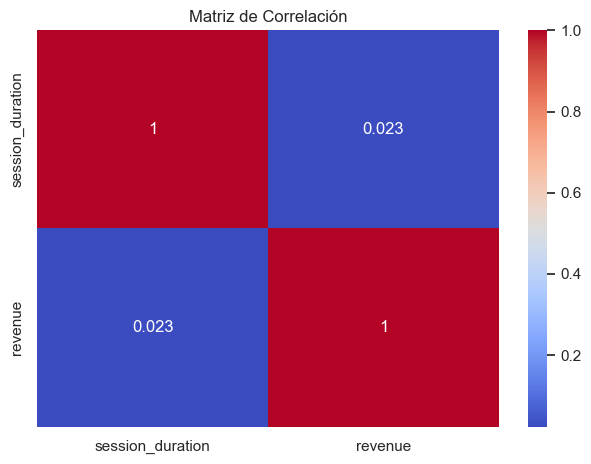

In [13]:
merged = visits.merge(orders, on="uid", how="left")
corr_df = merged[["session_duration", "revenue"]].dropna()

print("Matriz de correlación:\n", corr_df.corr(), "\n")

sns.heatmap(corr_df.corr(), annot=True, cmap="coolwarm")
plt.title("Matriz de Correlación")
plt.tight_layout()
plt.savefig("../reports/figures/raw/correlation_matrix.png")
plt.show()

## Valores Atípicos

Outliers para el Beneficio Económico

Resumen de Revenue:
count    50415.000000
mean         4.999647
std         21.818359
min          0.000000
25%          1.220000
50%          2.500000
75%          4.890000
max       2633.280000
Name: revenue, dtype: float64 

Percentiles de Revenue:
0.25     1.22
0.50     2.50
0.75     4.89
0.90     9.17
0.95    13.75
0.99    36.67
Name: revenue, dtype: float64 

Cantidad de outliers altos: 3990
Cantidad de outliers bajos: 0



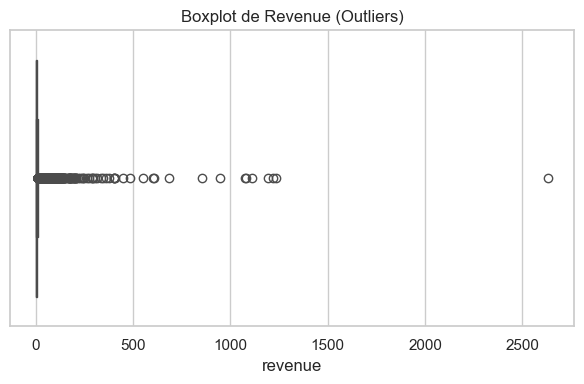

In [14]:
# Estadísticas relevantes
print("Resumen de Revenue:")
print(orders["revenue"].describe(), "\n")

# Percentiles detallados
percentiles = orders["revenue"].quantile([0.25, 0.5, 0.75, 0.90, 0.95, 0.99])
print("Percentiles de Revenue:")
print(percentiles, "\n")

# Cantidad de outliers extremos
q1 = orders["revenue"].quantile(0.25)
q3 = orders["revenue"].quantile(0.75)
iqr = q3 - q1
outlier_limit_high = q3 + 1.5 * iqr
outlier_limit_low = q1 - 1.5 * iqr
outliers_high = (orders["revenue"] > outlier_limit_high).sum()
outliers_low = (orders["revenue"] < outlier_limit_low).sum()
print(f"Cantidad de outliers altos: {outliers_high}")
print(f"Cantidad de outliers bajos: {outliers_low}\n")

# Boxplot
plt.figure(figsize=(6, 4))
sns.boxplot(data=orders, x="revenue")
plt.title("Boxplot de Revenue (Outliers)")
plt.tight_layout()
plt.savefig("../reports/figures/raw/revenue_boxplot.png")
plt.show()

## Tendencias

Tendencias Temporales para los datos de las Órdenes

Resumen de revenue diario:
count     364.000000
mean      692.464835
std       503.309340
min         3.420000
25%       378.907500
50%       596.850000
75%       869.780000
max      4661.330000
Name: revenue, dtype: float64 

Fechas con mayor revenue:
buy_date
2017-12-10    4661.33
2018-05-31    4613.92
2017-11-24    3398.35
2018-03-07    2093.76
2017-11-16    1915.83
Name: revenue, dtype: float64 

Fechas con menor revenue:
buy_date
2018-06-01      3.42
2018-03-30     29.22
2017-06-11     92.62
2017-06-17     98.01
2017-06-18    101.75
Name: revenue, dtype: float64 



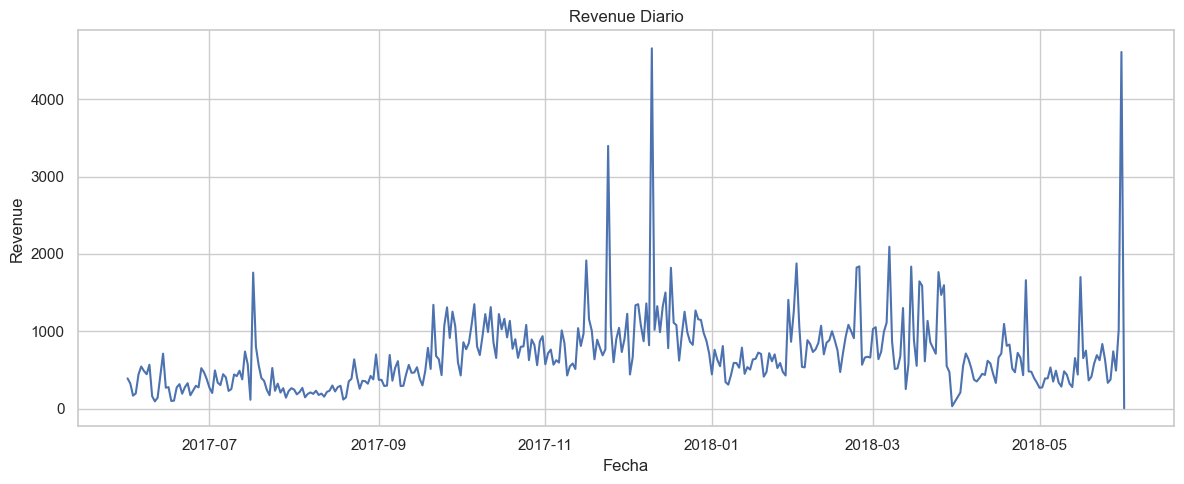

In [15]:
# Tendencia de revenue diario
orders["buy_date"] = orders["buy_ts"].dt.date
daily_revenue = orders.groupby("buy_date")["revenue"].sum()

# Mostrar información en consola
print("Resumen de revenue diario:")
print(daily_revenue.describe(), "\n")
print("Fechas con mayor revenue:")
print(daily_revenue.sort_values(ascending=False).head(), "\n")
print("Fechas con menor revenue:")
print(daily_revenue.sort_values().head(), "\n")

# Gráfico de revenue diario
plt.figure(figsize=(12, 5))
daily_revenue.plot()
plt.title("Revenue Diario")
plt.xlabel("Fecha")
plt.ylabel("Revenue")
plt.tight_layout()
plt.savefig("../reports/figures/raw/daily_revenue.png")
plt.show()


## Tendecias

Del mismo modo, tendencias temporales para las visitas

Resumen de visitas diarias:
count     364.000000
mean      987.362637
std       418.994796
min         1.000000
25%       635.500000
50%      1003.000000
75%      1280.000000
max      4042.000000
Name: uid, dtype: float64 

Fechas con más visitas:
visit_date
2017-11-24    4042
2018-05-31    2256
2017-11-25    2089
2018-02-01    1878
2018-03-26    1796
Name: uid, dtype: int64 

Fechas con menos visitas:
visit_date
2018-03-31      1
2018-03-30    134
2017-08-13    293
2017-08-06    296
2017-08-12    296
Name: uid, dtype: int64 



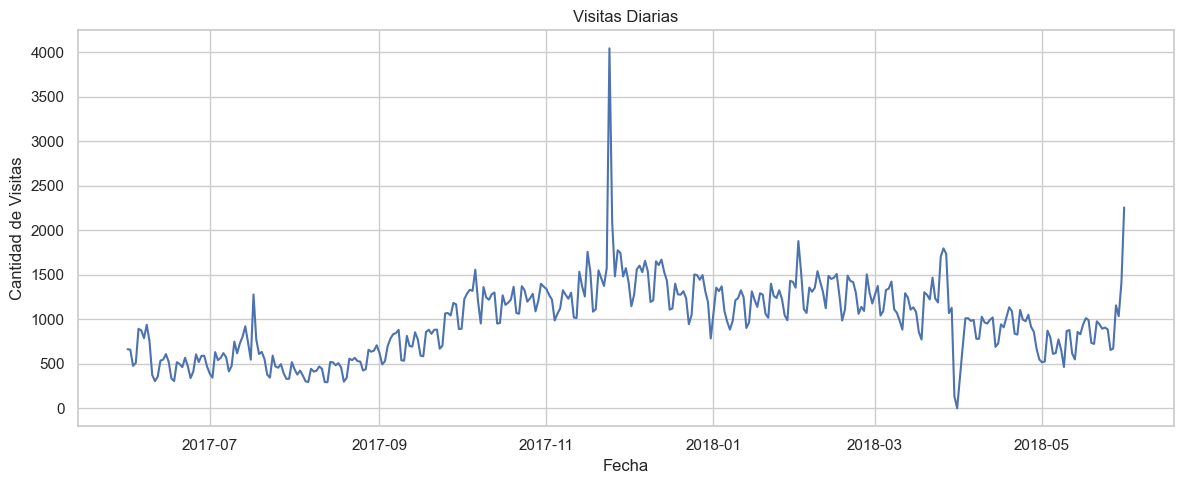

In [16]:
# Tendencia de visitas diarias
visits["visit_date"] = visits["start_ts"].dt.date
daily_visits = visits.groupby("visit_date")["uid"].count()

# Mostrar información en consola
print("Resumen de visitas diarias:")
print(daily_visits.describe(), "\n")
print("Fechas con más visitas:")
print(daily_visits.sort_values(ascending=False).head(), "\n")
print("Fechas con menos visitas:")
print(daily_visits.sort_values().head(), "\n")

# Gráfico de visitas diarias
plt.figure(figsize=(12, 5))
daily_visits.plot()
plt.title("Visitas Diarias")
plt.xlabel("Fecha")
plt.ylabel("Cantidad de Visitas")
plt.tight_layout()
plt.savefig("../reports/figures/raw/daily_visits.png")
plt.show()


## Sesiones Negativas

Hay un mínimo de -46, lo cual no tiene sentido, por lo tanto, las sesiones menores a cero se van a eliminar. También, se hace análisis de valores extremos antes y luego de transformar. Se recurre a percentiles 1% y 99%.

Valores negativos en session_duration:
        session_duration
2                    0.0
4                    0.0
28                   0.0
32                   0.0
54                   0.0
...                  ...
358511               0.0
358514               0.0
358522               0.0
358524               0.0
358529               0.0

[35796 rows x 1 columns]

Resumen estadístico original de 'revenue':
count    50415.000000
mean         4.999647
std         21.818359
min          0.000000
25%          1.220000
50%          2.500000
75%          4.890000
max       2633.280000
Name: revenue, dtype: float64

Resumen estadístico original de 'session_duration':
count    359400.000000
mean         10.717095
std          16.618796
min         -46.000000
25%           2.000000
50%           5.000000
75%          14.000000
max         711.000000
Name: session_duration, dtype: float64

Número de registros eliminados en 'session_duration': 35796

Resumen estadístico después de eliminar registr

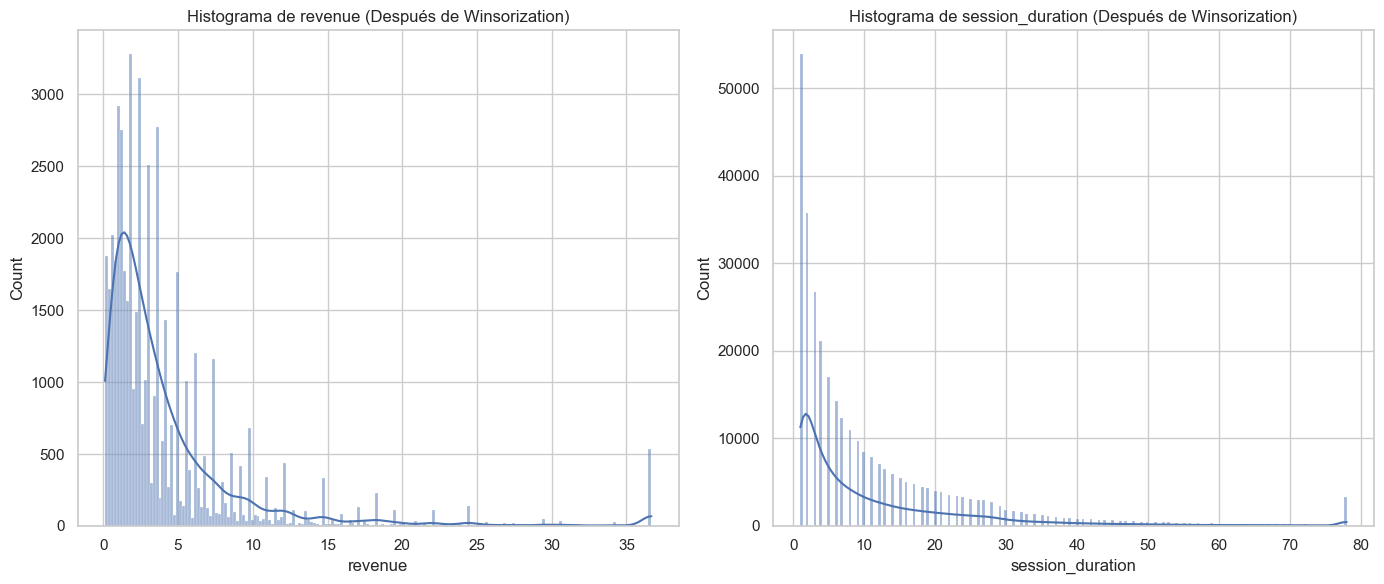

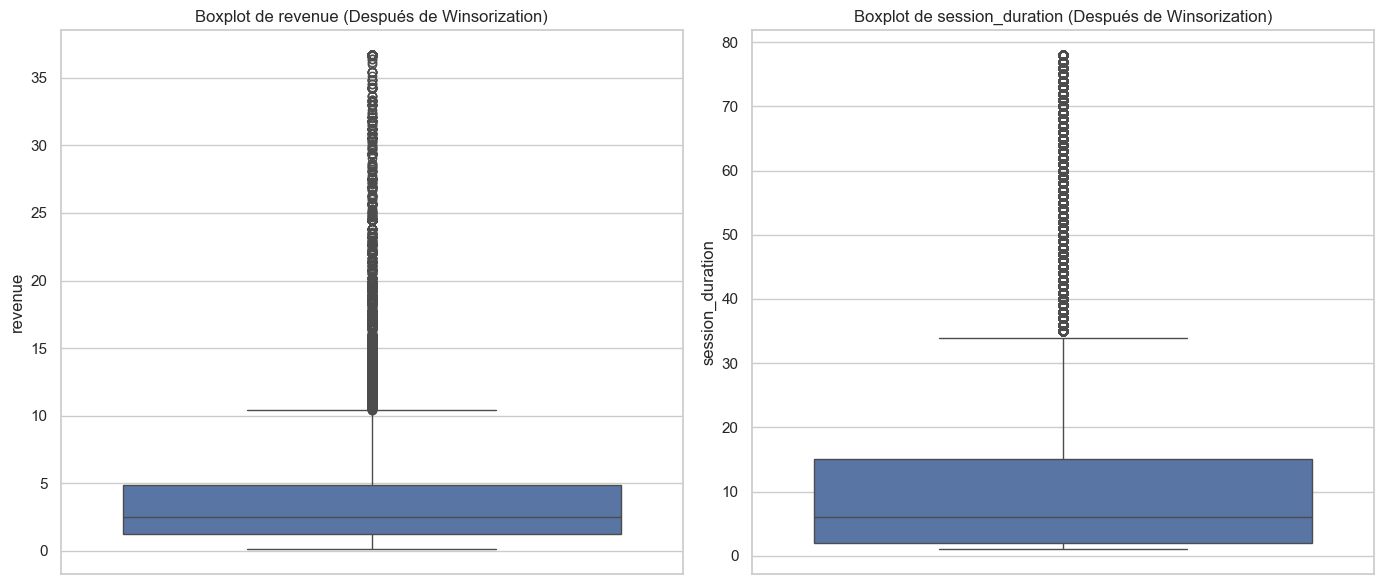

In [17]:
# 1. Verificación básica de valores extremos y negativos
print("Valores negativos en session_duration:")
print(visits[visits['session_duration'] <= 0][['session_duration']])

# Descripción estadística antes de transformar
print("\nResumen estadístico original de 'revenue':")
print(orders['revenue'].describe())

print("\nResumen estadístico original de 'session_duration':")
print(visits['session_duration'].describe())

# 2. Eliminar registros con session_duration <= 0
visits_cleaned = visits[visits['session_duration'] > 0].copy()
print(f"\nNúmero de registros eliminados en 'session_duration': {len(visits) - len(visits_cleaned)}")

# Resumen estadístico después de la limpieza
print("\nResumen estadístico después de eliminar registros negativos de 'session_duration':")
print(visits_cleaned['session_duration'].describe())

# 3. Winsorizing manual usando percentiles
def manual_winsorize(series, lower_quantile=0.01, upper_quantile=0.99):
    lower = series.quantile(lower_quantile)
    upper = series.quantile(upper_quantile)
    return series.clip(lower=lower, upper=upper)

# Aplicar winsorizing manual
orders['revenue'] = manual_winsorize(orders['revenue'])
visits_cleaned['session_duration'] = manual_winsorize(visits_cleaned['session_duration'])

# Resumen estadístico después de Winsorizing
print("\nResumen estadístico después de Winsorizing para 'revenue':")
print(orders['revenue'].describe())

print("\nResumen estadístico después de Winsorizing para 'session_duration':")
print(visits_cleaned['session_duration'].describe())

# 4. Visualización

def save_and_show_plot(fig, plot_name):
    plt.tight_layout()
    fig.savefig(f'../reports/figures/raw/{plot_name}.png')
    plt.show()

# Histogramas antes de la transformación
fig, ax = plt.subplots(1, 2, figsize=(14,6))
sns.histplot(orders['revenue'], kde=True, ax=ax[0])
ax[0].set_title('Histograma de revenue (Después de Winsorization)')
sns.histplot(visits_cleaned['session_duration'], kde=True, ax=ax[1])
ax[1].set_title('Histograma de session_duration (Después de Winsorization)')
save_and_show_plot(fig, 'after_winsorizing_histograms')

# Boxplots después de la transformación
fig, ax = plt.subplots(1, 2, figsize=(14,6))
sns.boxplot(data=orders['revenue'], ax=ax[0])
ax[0].set_title('Boxplot de revenue (Después de Winsorization)')
sns.boxplot(data=visits_cleaned['session_duration'], ax=ax[1])
ax[1].set_title('Boxplot de session_duration (Después de Winsorization)')
save_and_show_plot(fig, 'after_winsorizing_boxplots')

Costos diarios - resumen:
count     364.000000
mean      904.207747
std       396.956825
min         0.700000
25%       595.682500
50%       873.655000
75%      1155.605000
max      3458.860000
Name: costs, dtype: float64 



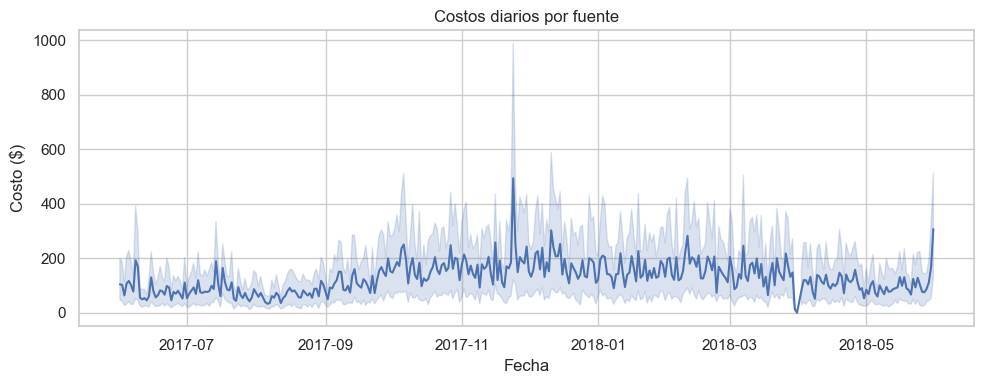

In [18]:
# Estadísticas resumen
print("Costos diarios - resumen:")
print(costs.groupby("dt")["costs"].sum().describe(), "\n")

# Visualización
plt.figure(figsize=(10, 4))
sns.lineplot(data=costs, x="dt", y="costs")
plt.title("Costos diarios por fuente")
plt.xlabel("Fecha")
plt.ylabel("Costo ($)")
plt.tight_layout()
plt.savefig("../reports/figures/raw/daily_costs.png")
plt.show()


## Guardado de archivos limpios intermedios

Debido a la limpieza anterior de sesiones negativas, se guardan todos los datos limpios intermedios en el directorio `data/interim`

In [19]:
# Crear directorio si no existe
interim_path = os.path.join("..", "data", "interim")
os.makedirs(interim_path, exist_ok=True)

# Guardar visitas limpias (ya sin duración negativa)
visits_cleaned = visits[visits["session_duration"] >= 0]
visits_cleaned.to_csv(os.path.join(interim_path, "visits.csv"), index=False)

# Guardar órdenes (sin modificar)
orders.to_csv(os.path.join(interim_path, "orders.csv"), index=False)

# Guardar costos (sin modificar)
costs.to_csv(os.path.join(interim_path, "costs.csv"), index=False)

print("Datos intermedios guardados en '../data/interim/'")

Datos intermedios guardados en '../data/interim/'
